In [17]:
#  pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# datetime and calender for preposcessing --> set datetime to time offset
from datetime import datetime
# calender for optinal filtering for weekdays
import calendar

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

# read excel to dataframe
iter_csv = pd.read_excel('data/PRAnlage_Belegung_Datensatz.xlsx')

# create subdataframe from data where PR_Anlage_ID is smaller than 2 
df = iter_csv[(iter_csv['PR_Anlage_ID'] < 2)]

# print info of new dataframe
df.info()

# lists for creating df afterwards
listR = []
listT = []
  
# go though whole dataframe and get time and percentage ('Besetzte Parkplaetze'/'Gesamtzahl Parkplaetze')
#len(df.axes[0]) --> number of rows in df
for value in range(len(df.axes[0])):
    # in comments --> in case of filtering for specific weekday
    #print(calendar.day_name[df['Datum/Uhrzeit'][value].date().weekday()])
    #if('Thursday'==(calendar.day_name[df['Datum/Uhrzeit'][value].date().weekday()]) ):
       
    available = df['Gesamtzahl Parkplaetze'][value]
    full = df['Besetzte Parkplaetze'][value]
    
    percentageFull = full/available
    listR.append(percentageFull)
    
    timeoffset = df['Datum/Uhrzeit'][value]
   
    listT.append(timeoffset)
# create dataframes from lists   
df_percentageFull = pd.DataFrame(listR, columns=['percentageFull']) 
df_timeoffset = pd.DataFrame(listT, columns=['time_offset']) 

# concat dataframes to one
df_day = pd.concat([df_timeoffset, df_percentageFull], axis=1)

    
# group data by hour and minute and mean the values (-> percentage)
grouped = df_day.groupby([df_day['time_offset'].dt.hour  , df_day['time_offset'].dt.minute]).mean()

# create new list for converting datetime to time offset
mylist=[]

for name in grouped.index:
    hour = name[0]
    minute = name[1]
    percent = grouped.loc[name]
    percent_list = percent.tolist()
    
    #print('Hour: ', hour, 'Minute: ',minute, 'Percent: ',percent_list[0] )
    
    # calculate time offset from hour and minute
    timeoffset = (minute + (hour*60))-12*60 

    mylist.append([timeoffset,percent_list[0]])

# create new dataframe from mylist, containing the columns 'time_offset' and 'percentageFull'
df = pd.DataFrame(mylist, columns = ['time_offset', 'percentageFull']) 
print(df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17147 entries, 0 to 17146
Data columns (total 15 columns):
PR_Anlage_ID                     17147 non-null int64
Datum/Uhrzeit                    17147 non-null datetime64[ns]
Freie Parkplaetze                17147 non-null int64
Gesamtzahl Parkplaetze           17147 non-null int64
Besetzte Parkplaetze             17147 non-null int64
Gesamt Familienparkplaetze       17147 non-null int64
Freie Familienparkplaetze        17147 non-null int64
Gesamt Frauenparkplaetze         17147 non-null int64
Freie Frauenparkplaetze          17147 non-null int64
Gesamt Behindertenparkplaetze    17147 non-null int64
Freie Behindertenparkplaetze     17147 non-null int64
Gesamt E-mobility Parkplaetze    17147 non-null int64
Freie E-mobility Parkplaetze     17147 non-null int64
Gesamt Standardparkplaetze       17147 non-null int64
Freie Standardparkplaetze        17147 non-null int64
dtypes: datetime64[ns](1), int64(14)
memory usage: 2.1 MB
     time_offs

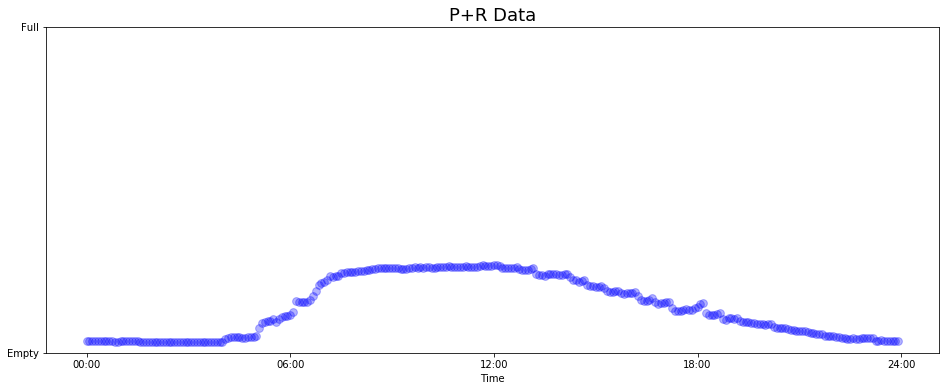

In [18]:

space_labels = ['00:00', '06:00', '12:00', '18:00', '24:00']

figsize(16, 6)

# Parking data
plt.scatter(df['time_offset'], df['percentageFull'], 
            s= 60, alpha=0.3, facecolor = 'b', edgecolors='b')
plt.yticks([0, 1], ['Empty', 'Full']); plt.xlabel('Time'); 
plt.title('P+R Data', size = 18)
plt.xticks([-720, -360, 0, 360, 720], space_labels);

In [19]:
# install hmmlearn if required (remark: requires downgrade of some packages)

import datetime

import numpy as np

import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

df = df.rename_axis('ID').values
print(df)

[[-7.20000000e+02  3.61368724e-02]
 [-7.15000000e+02  3.67764631e-02]
 [-7.10000000e+02  3.70962584e-02]
 [-7.05000000e+02  3.51774864e-02]
 [-7.00000000e+02  3.54972817e-02]
 [-6.95000000e+02  3.54972817e-02]
 [-6.90000000e+02  3.54972817e-02]
 [-6.85000000e+02  3.61368724e-02]
 [-6.80000000e+02  3.58170771e-02]
 [-6.75000000e+02  3.48576911e-02]
 [-6.70000000e+02  3.45378957e-02]
 [-6.65000000e+02  3.38983051e-02]
 [-6.60000000e+02  3.48576911e-02]
 [-6.55000000e+02  3.51774864e-02]
 [-6.50000000e+02  3.48576911e-02]
 [-6.45000000e+02  3.61368724e-02]
 [-6.40000000e+02  3.58170771e-02]
 [-6.35000000e+02  3.54972817e-02]
 [-6.30000000e+02  3.58170771e-02]
 [-6.25000000e+02  3.42181004e-02]
 [-6.20000000e+02  3.29389191e-02]
 [-6.15000000e+02  3.35785098e-02]
 [-6.10000000e+02  3.35785098e-02]
 [-6.05000000e+02  3.32587144e-02]
 [-6.00000000e+02  3.38983051e-02]
 [-5.95000000e+02  3.32587144e-02]
 [-5.90000000e+02  3.29389191e-02]
 [-5.85000000e+02  3.26191238e-02]
 [-5.80000000e+02  3


Training the Hidden Markov Model...

Means and variances:

Hidden state 1
Mean = 0.04
Variance = 0.0

Hidden state 2
Mean = 0.2
Variance = 0.0

Hidden state 3
Mean = 0.14
Variance = 0.0

Hidden state 4
Mean = 0.09
Variance = 0.0

Hidden state 5
Mean = 0.26
Variance = 0.0


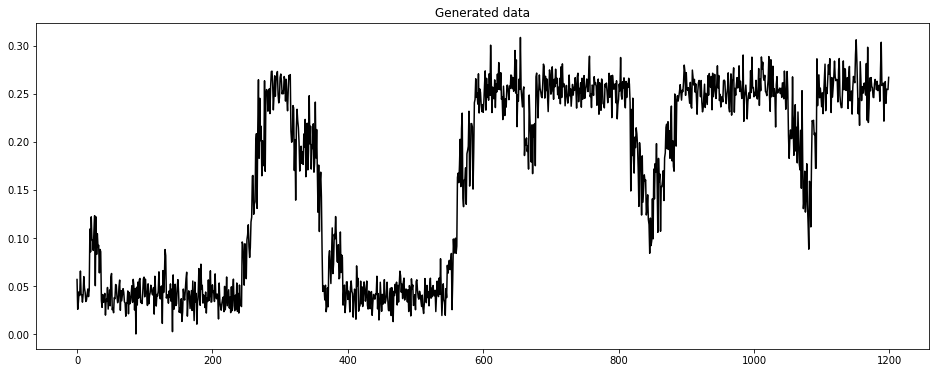

In [20]:
# Extract the data column (third column) for training 
X = np.column_stack([df[:, 1]])

# Create a Gaussian HMM 
num_components = 5

#2-10 probieren

hmm = GaussianHMM(n_components=num_components, 
        covariance_type='diag', n_iter=1000)
#n_iter kann sätker angepasst werden --> höhere Werte ausprobieren

# Train the HMM 
print('\nTraining the Hidden Markov Model...')
hmm.fit(X)

# Print HMM stats
print('\nMeans and variances:')
for i in range(hmm.n_components):
    print('\nHidden state', i+1)
    print('Mean =', round(hmm.means_[i][0], 2))
    print('Variance =', round(np.diag(hmm.covars_[i])[0], 2))

# Generate data using the HMM model
num_samples = 1200
generated_data, _ = hmm.sample(num_samples) 
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')

plt.show()